In [1]:
#packages for data analysis
import numpy as np
import pandas as pd

import sklearn
from sklearn import svm
from sklearn.metrics import mean_squared_error

#to visualize data
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set(font_scale = 1.2)

%matplotlib inline

## id:4-4-4 

In [2]:
week3 = pd.read_csv('/Users/vivekbhadula/TCD Study/MachineLearning/Week3/week3New.csv')
print(f'The shape of the given csv file is {week3.shape} \n')
week3.columns = ['X1', 'X2', 'y']
print(week3.head())

The shape of the given csv file is (198, 3) 

     X1    X2         y
0  0.58  0.82  0.896753
1 -0.80 -0.01  0.659866
2  0.32  0.34  0.177644
3 -1.00 -0.24  0.748863
4 -0.17 -0.95 -1.263560


In [3]:
X1 = week3.iloc[:,0]
X2 = week3.iloc[:,1]
x = np.column_stack((X1,X2))
y = week3.iloc[:,2]

## (i)(a)

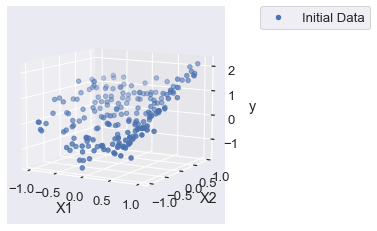

In [15]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection="3d")
ax.scatter(X1,X2,y, label='Initial Data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.legend(bbox_to_anchor=(1.7, 1.03))
ax.view_init(10)

## [ (i)(b): Adding polynomial features and training Lasso Regression Model
## (i)(c): 3D data plot ]

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

In [6]:
trans = PolynomialFeatures(degree=5)
newRows = trans.fit_transform(x)
print(f'{newRows}\nLength of newRows: {len(newRows[0])}')

[[ 1.00000000e+00  5.80000000e-01  8.20000000e-01 ...  1.85480195e-01
   2.62230621e-01  3.70739843e-01]
 [ 1.00000000e+00 -8.00000000e-01 -1.00000000e-02 ... -6.40000000e-07
  -8.00000000e-09 -1.00000000e-10]
 [ 1.00000000e+00  3.20000000e-01  3.40000000e-01 ...  4.02472960e-03
   4.27627520e-03  4.54354240e-03]
 ...
 [ 1.00000000e+00  1.70000000e-01  3.40000000e-01 ...  1.13588560e-03
   2.27177120e-03  4.54354240e-03]
 [ 1.00000000e+00  5.00000000e-02 -8.70000000e-01 ... -1.64625750e-03
   2.86448805e-02 -4.98420921e-01]
 [ 1.00000000e+00  5.80000000e-01 -6.60000000e-01 ... -9.67136544e-02
   1.10053469e-01 -1.25233258e-01]]
Length of newRows: 21



For Lasso C = 0.1 :
The score is : 0.0
The coefficients are : [ 0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.
  0.  0.  0.]
The intercept is : 0.2790748111974414


For Lasso C = 0.5 :
The score is : 0.0
The coefficients are : [ 0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.
  0.  0.  0.]
The intercept is : 0.2790748111974414


For Lasso C = 1 :
The score is : 0.0
The coefficients are : [ 0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.
  0.  0.  0.]
The intercept is : 0.2790748111974414


For Lasso C = 5 :
The score is : 0.6777119657632946
The coefficients are : [ 0.          0.          0.75104945  0.          0.         -0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.          0.          0.
  0.          0.          0.        ]
The intercept is : 0.3146548304392894


For Lasso C = 10 :
The score is : 0.8645307837777857
The coefficients are : [ 0.      

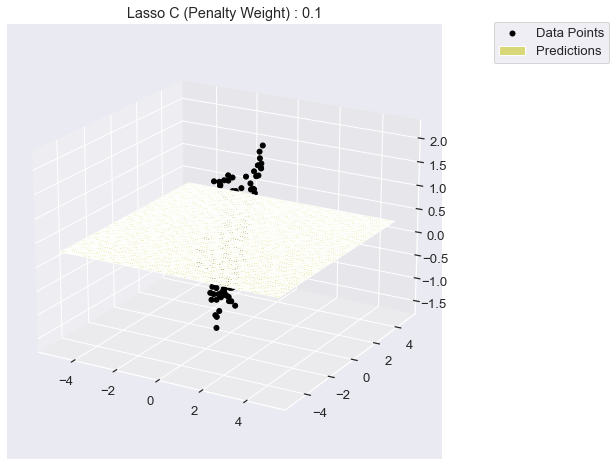

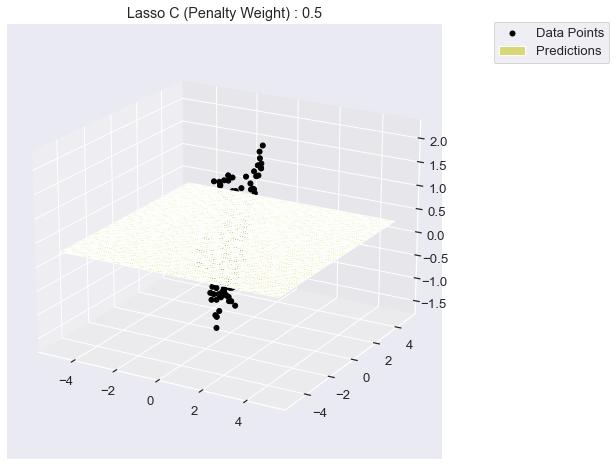

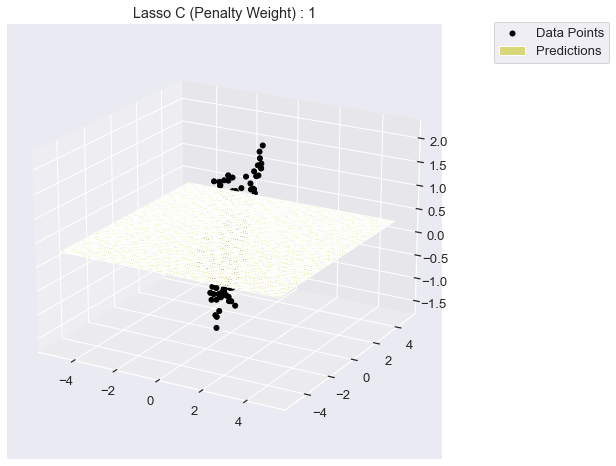

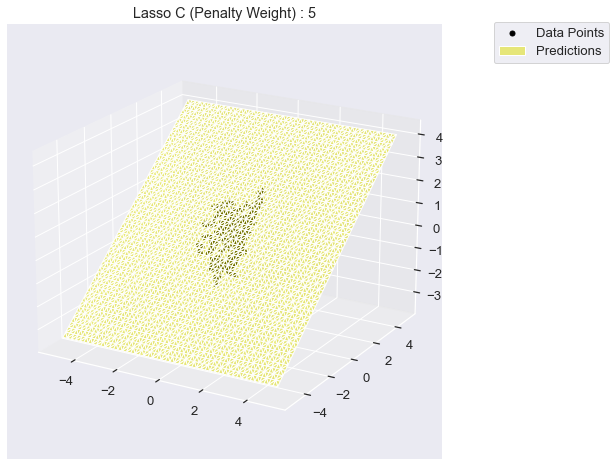

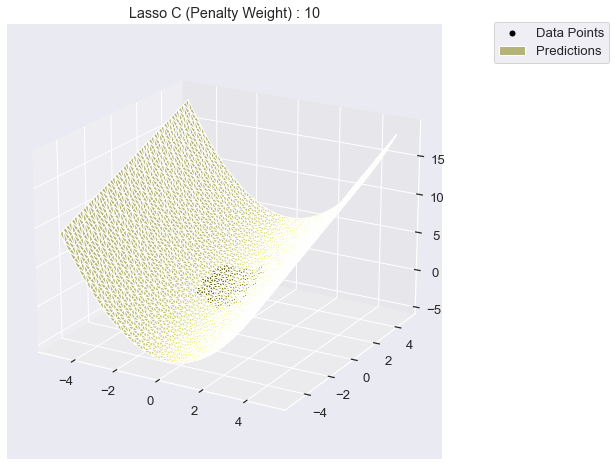

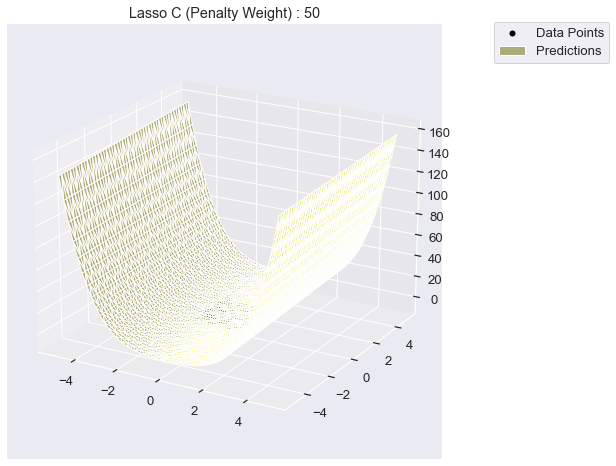

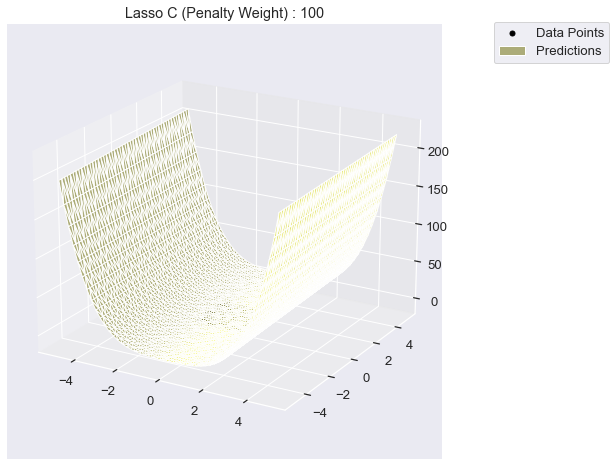

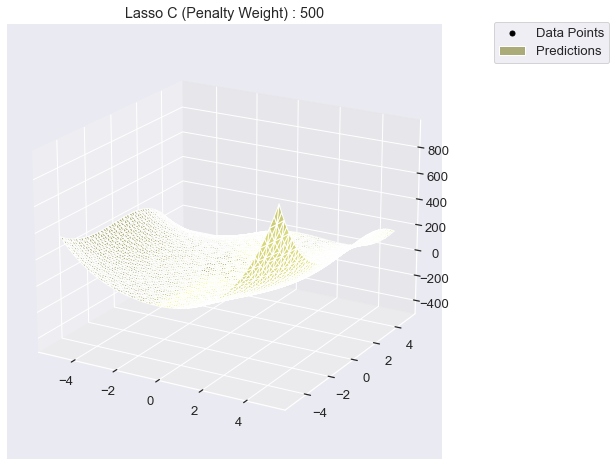

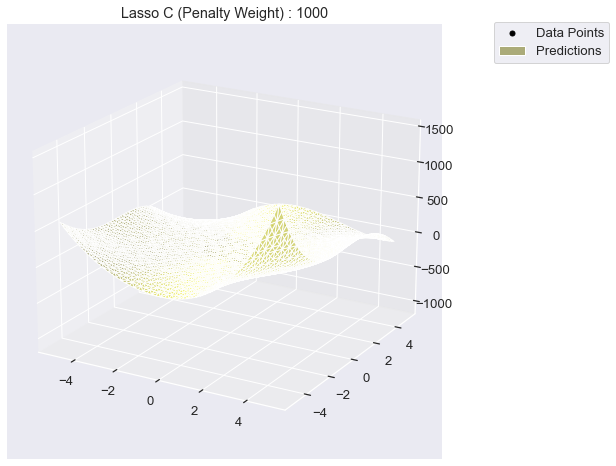

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

Xtest = []
grid=np.linspace(-5,5)
for i in grid:
    for j in grid:
        Xtest.append([i,j])
Xtest = np.array(Xtest)

Xtest1 = PolynomialFeatures(degree=5)
newXtest = Xtest1.fit_transform(Xtest)
newXtrain = PolynomialFeatures(degree=5).fit_transform(x)

cArr = [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]

for c in cArr:
    lassoModel = Lasso(alpha=(1/(2*c)))
    lassoModel.fit(newXtrain, y)
    yPred = lassoModel.predict(newXtest)
    
    print(f'\nFor Lasso C = {c} :')
    print(f'The score is : {lassoModel.score(newRows, y)}')
    print(f'The coefficients are : {lassoModel.coef_}')
    print(f'The intercept is : {lassoModel.intercept_}\n')
    
    figure1 = plt.figure(figsize=(8, 8))
    figure2 = figure1.add_subplot(111,projection='3d')
    figure2.scatter(X1, X2, y, s = 25, alpha=1, color='black', label='Data Points')
    figure2.set_title(f'Lasso C (Penalty Weight) : {c}')
    surfacePlot = figure2.plot_trisurf(Xtest[:, 0], Xtest[:, 1], yPred, alpha=0.5, color='yellow', label='Predictions')
    
    surfacePlot._facecolors2d = surfacePlot._facecolor3d
    surfacePlot._edgecolors2d = surfacePlot._edgecolor3d
    figure2.legend(bbox_to_anchor=(1.4, 1.02))
    
    figure2.view_init(20)

## (i)(e)


For Ridge C = 0.1 :
The score is : 0.9233420954781904
The coefficients are : [ 0.         -0.0255327   0.79903153  0.49581971  0.02184895 -0.03919143
  0.05071074  0.08296941  0.01384482  0.22529105  0.41645081  0.03361976
  0.13641897 -0.03409304 -0.0135919   0.04770999 -0.01312532  0.03310702
 -0.10199213  0.03673433  0.04404036]
The intercept is : 0.07678069881198785


For Ridge C = 0.5 :
The score is : 0.9338912757949732
The coefficients are : [ 0.         -0.04119995  0.93901575  0.61334813  0.0162436  -0.03082102
  0.08585979  0.12512288 -0.00632725  0.16041117  0.44546815  0.0639849
  0.02586114 -0.05730001  0.0092836   0.02219835 -0.03614043  0.05582128
 -0.25625886  0.06662309 -0.02126459]
The intercept is : 0.033396018105123465


For Ridge C = 1 :
The score is : 0.9350947895476045
The coefficients are : [ 0.00000000e+00 -4.85969504e-02  9.59831739e-01  6.65575959e-01
  9.01037831e-04 -1.96730815e-02  1.18441794e-01  1.78499929e-01
 -3.35554060e-02  1.34804281e-01  4.29464048

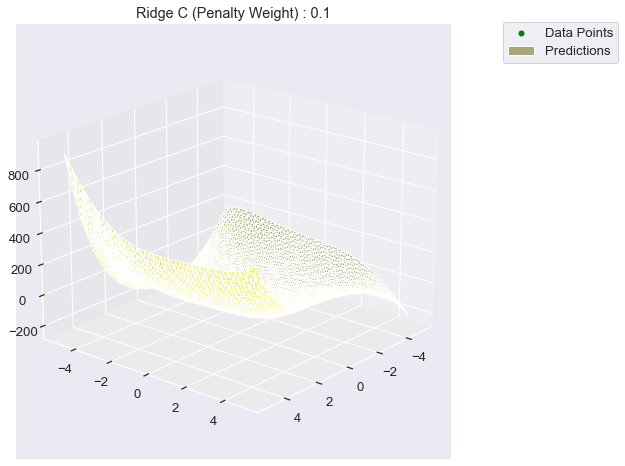

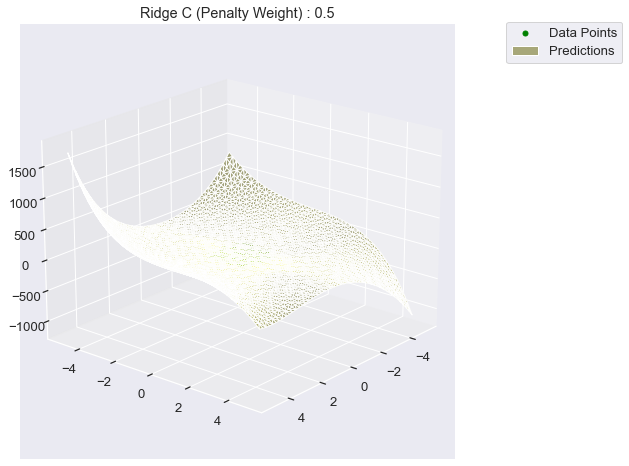

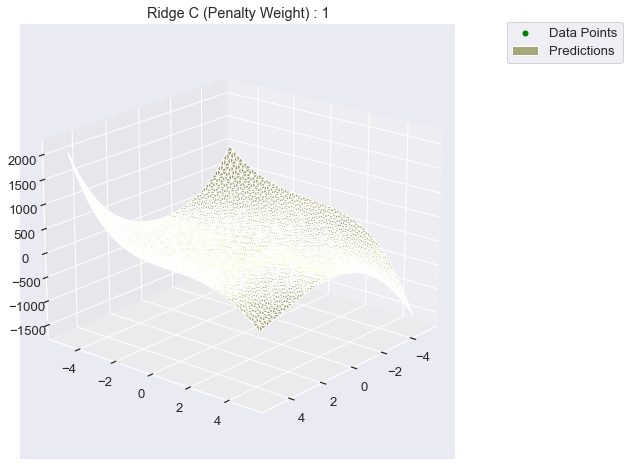

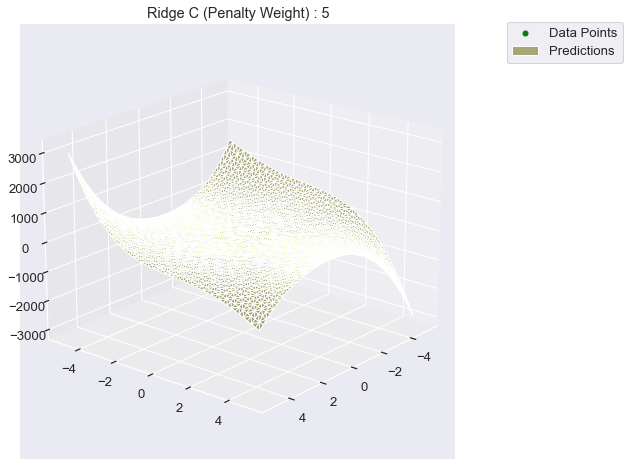

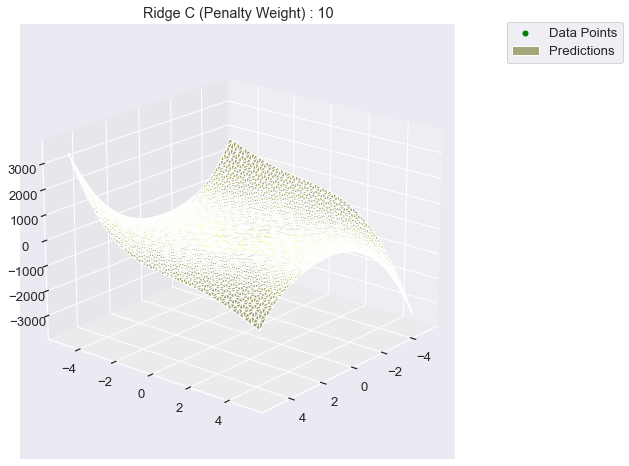

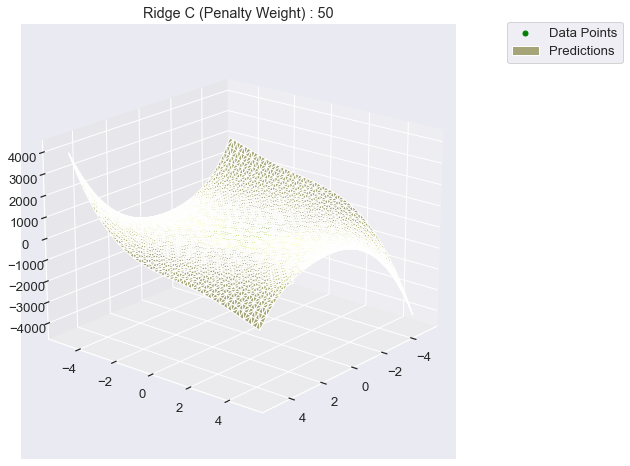

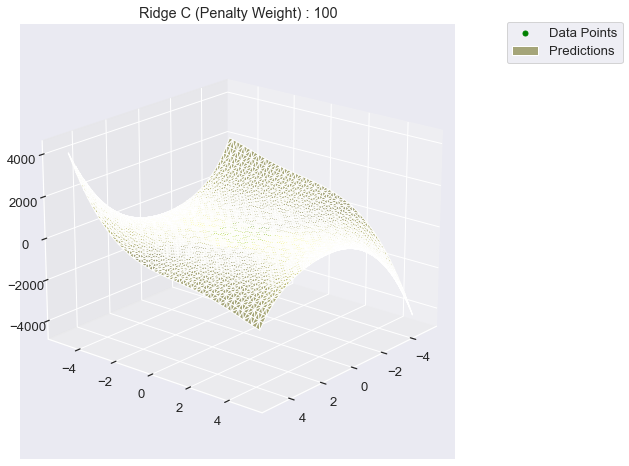

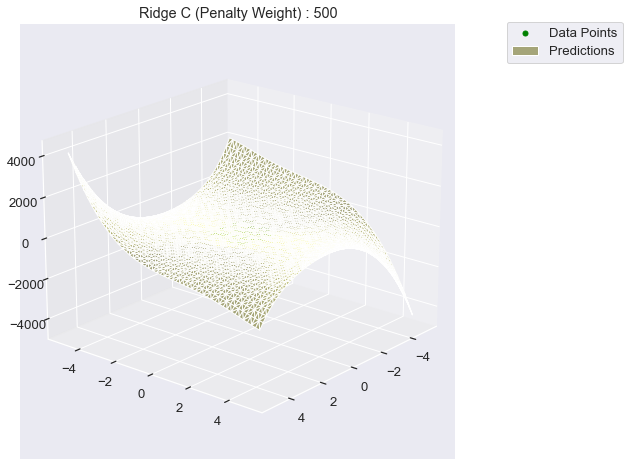

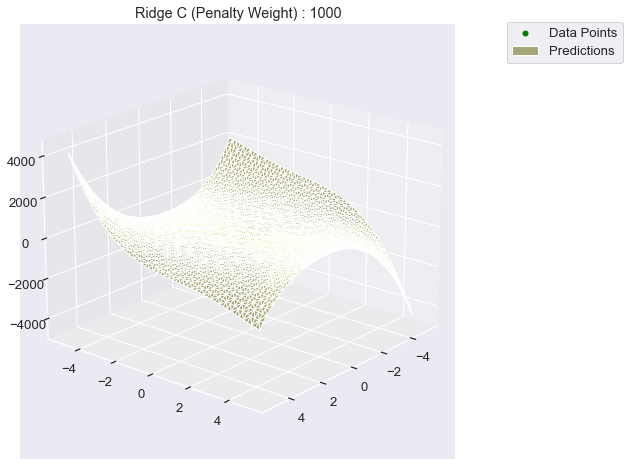

In [8]:
from sklearn.linear_model import Ridge

for c in cArr:
    ridgeRegression = Ridge(alpha=(1/(2*c)))
    ridgeRegression.fit(newXtrain, y)
    yPred = ridgeRegression.predict(newXtest)
    
    print(f'\nFor Ridge C = {c} :')
    print(f'The score is : {ridgeRegression.score(newRows, y)}')
    print(f'The coefficients are : {ridgeRegression.coef_}')
    print(f'The intercept is : {ridgeRegression.intercept_}\n')
    
    figure1 = plt.figure(figsize=(8, 8))
    figure2 = figure1.add_subplot(111,projection='3d')
    figure2.scatter(X1, X2, y, s = 25, alpha=1, color='green', label='Data Points')
    figure2.set_title(f'Ridge C (Penalty Weight) : {c}')
    surfacePlot = figure2.plot_trisurf(Xtest[:, 0], Xtest[:, 1], yPred, alpha=0.5, color='yellow', label='Predictions')
    
    surfacePlot._facecolors2d = surfacePlot._facecolor3d
    surfacePlot._edgecolors2d = surfacePlot._edgecolor3d
    figure2.legend(bbox_to_anchor=(1.4, 1.02))
    
    figure2.view_init(20,40)

## (ii)(a)

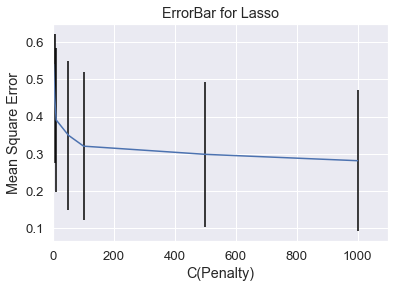

In [16]:
lassoMeanStdSet = []
meanLassoPredError=[]
stdLassoPredError=[]
for c in cArr:
    lassoModel = Lasso(alpha=1/(2*c))
    for train, test in KFold(n_splits=5).split(week3):
        lassoModel.fit(x[train], y[train])
        yPredL = lassoModel.predict(x[test])
        lassoMeanStdSet.append(mean_squared_error(y[test],yPredL))
    meanLassoPredError.append(np.array(lassoMeanStdSet).mean())
    stdLassoPredError.append(np.array(lassoMeanStdSet).std())

plt.errorbar(cArr, meanLassoPredError, yerr=stdLassoPredError, ecolor='black')
plt.title('ErrorBar for Lasso')
plt.xlabel('C(Penalty)')
plt.ylabel('Mean Square Error')
plt.xlim((0,1100))
plt.show()

## (ii)(c)

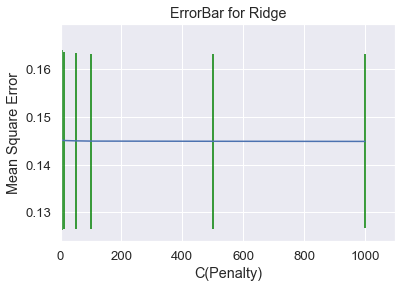

In [17]:
ridgeMeanStdSet = []
meanRidgePredError=[]
stdRidgePredError=[]
for c in cArr:
    ridgeModel = Ridge(alpha=1/(2*c))
    for train, test in KFold(n_splits=5).split(week3):
        ridgeModel.fit(x[train], y[train])
        yPredR = ridgeModel.predict(x[test])
        from sklearn.metrics import mean_squared_error
        ridgeMeanStdSet.append(mean_squared_error(y[test],yPredR))
    meanRidgePredError.append(np.array(ridgeMeanStdSet).mean())
    stdRidgePredError.append(np.array(ridgeMeanStdSet).std())

plt.errorbar(cArr, meanRidgePredError, yerr=stdRidgePredError, ecolor='green')
plt.title('ErrorBar for Ridge')
plt.xlabel('C(Penalty)')
plt.ylabel('Mean Square Error')
plt.xlim((0,1100))
plt.show()